In [9]:
import coronavirus
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
coronavirus.save_csv(['Germany'])

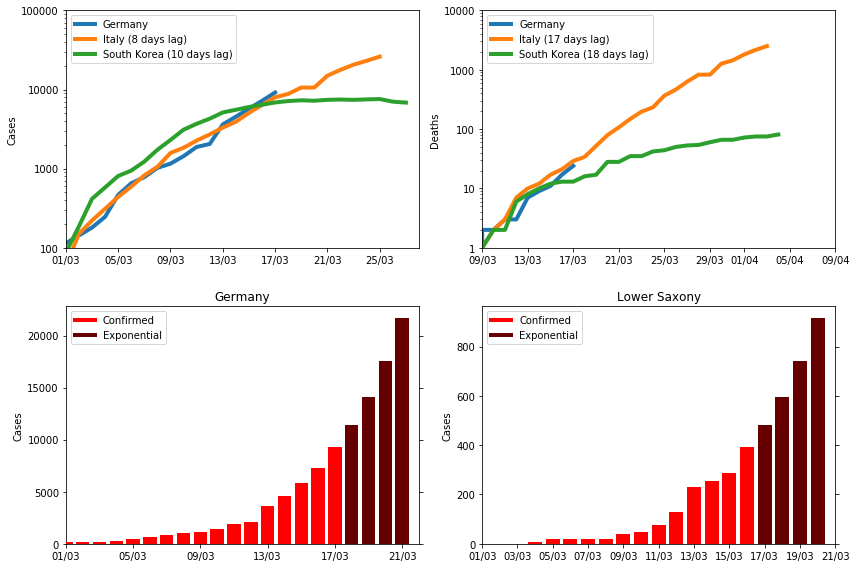

In [14]:
# Single plots with all observables

#Parameters
countries_list = ['Germany', 'Italy', 'Korea, South']
m_range = [1.19,1.28]

#Plots stuff
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2,2)
ax_cases = fig.add_subplot(gs[0,0])
ax_deaths = fig.add_subplot(gs[0,1])
ax_de = fig.add_subplot(gs[1,0])
ax_nieder = fig.add_subplot(gs[1,1])

df = coronavirus.get_data()
coronavirus.plot_countries(df,countries_list,variable='current', lag_countries=[0,-8,-10], xlim=['2020-03-01','2020-03-28'], ylim=[100,1e5], ax=ax_cases,**{'linewidth':4})
coronavirus.plot_countries(df,countries_list,variable='deaths', lag_countries=[0,-17,-18], xlim=['2020-03-09','2020-04-09'], ylim=[1,1e4],ax=ax_deaths,**{'linewidth':4})
coronavirus.plot_prediction_csv('data/confirmed_germany.csv', m_range, days=4, title='Germany',ax=ax_de, **{'zorder':4})
coronavirus.plot_prediction_csv('data/confirmed_lowersaxony.csv', m_range, days=4, title='Lower Saxony',ax=ax_nieder, **{'zorder':4})

#Beautifies plots
plt.tight_layout()
ax_cases.legend(['Germany','Italy (8 days lag)', 'South Korea (10 days lag)'])
ax_deaths.legend(['Germany','Italy (17 days lag)', 'South Korea (18 days lag)'])
#ax_de.grid(True)
#ax_nieder.grid(True)
ax_de.tick_params(bottom=True, top=False, left=True, right=True)
ax_nieder.tick_params(bottom=True, top=False, left=True, right=True)
ax_cases.set_xlabel('')
ax_cases.set_ylabel('Cases')
ax_deaths.set_xlabel('')
ax_deaths.set_ylabel('Deaths')
plt.savefig('plot_data.pdf')
plt.savefig('plot_data.png')

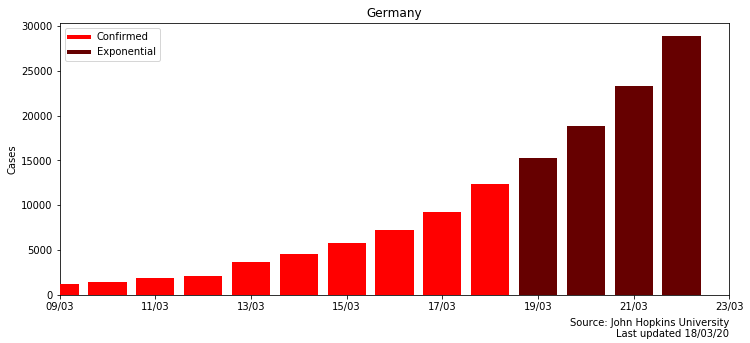

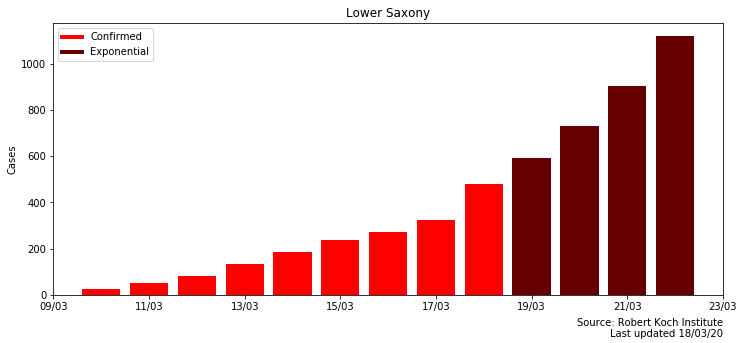

In [45]:
m_range = [1.19,1.28]
coronavirus.plot_prediction_csv('data/confirmed_germany.csv', m_range, days=4, title='Germany', **{'zorder':4})
plt.xlim([pd.Timestamp('2020-03-09'),pd.Timestamp('2020-03-23')])
ax = plt.gca()
ax.annotate('Source: John Hopkins University\nLast updated 18/03/20', xy=(1,0), xycoords=('axes fraction','figure fraction'), xytext=(0,6), textcoords='offset points', ha='right')
#ax.annotate('Last updated: today', xy=(1,0), xycoords=('axes fraction','figure fraction'), xytext=(0,10), textcoords='offset points', ha='right')
plt.savefig('prediction_germany.jpg')

coronavirus.plot_prediction_csv('data/confirmed_lowersaxony_new.csv', m_range, days=4, title='Lower Saxony', **{'zorder':4})
plt.xlim([pd.Timestamp('2020-03-09'),pd.Timestamp('2020-03-23')])
ax = plt.gca()
ax.annotate('Source: Robert Koch Institute\nLast updated 18/03/20', xy=(1,0), xycoords=('axes fraction','figure fraction'), xytext=(0,6), textcoords='offset points', ha='right')
plt.savefig('prediction_lowersaxony.jpg')